## Exploratory Data Analysis for Housing Sales Project


In [1]:
#Importing required packages
import pandas as pd
import numpy as np
from scipy import stats, integrate
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

In [2]:
#Loading the datasets
train = pd.read_csv("./input/train.csv")
test = pd.read_csv("./input/test.csv")

In [3]:
#Used shape function to get shape of the datasets to see what we're working with first

print("Train Shape: ", train.shape)
print("Test Shape: ", test.shape)

Train Shape:  (1460, 81)
Test Shape:  (1459, 80)


In [4]:
#TABLE 1 and TABLE 2
#Look at the variables that I need to consider, what type are they?
#Missing variables that will affect quality?

#Features that are missing values have counts less than 1460 (the total number of rows). 
#In using #describe(), 38 columns are returned so 38 columns contain quantitative data while the other 43 contain qualitative 
#data.
train.info()
train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
#TABlE 3
#Since from the info() function I found that there were missing values in the train dataset, I wanted to see which ones 
#definitively had missing values to either address them down the road or to see if I could avoid them altogether in my analysis.

#The quantitative features with missing data (as seen above) are LotFrontage, GarageYrBlt, and MasVnrArea. The rest are
#qualitative.
null_values = train.isnull().sum().sort_values(ascending = False)
null_values.head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
Utilities          0
dtype: int64

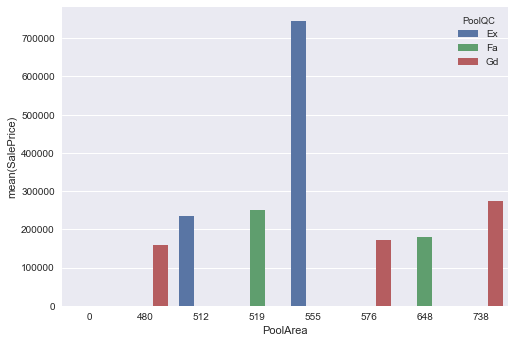

In [6]:
#FIGURE 1
#Looking at Pool Quality and PoolArea --> Only 7 houses have pools. The 1453 that don't have pools have a pool area of 0. Can
#put the PoolQC of those 1453 houses as None.
sns.barplot(x="PoolArea", y="SalePrice", hue="PoolQC", data=train)

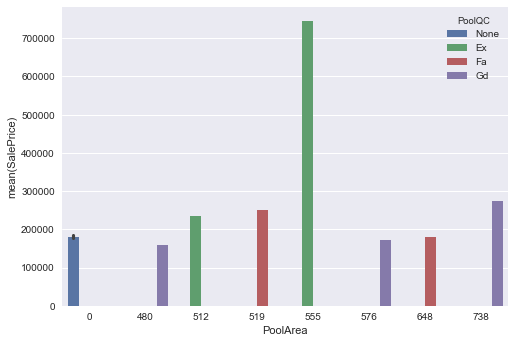

In [7]:
#FIGURE 2
#PoolQC missing values imputation. Now see that the 1453 houses have 0 pools with a PoolQC of None.
#Interesting to note that a pool area of around 565 square feet in addition to a pool having excellent quality increases price.
train.loc[train.PoolQC.isnull(), "PoolQC"] = "None"
sns.barplot(x="PoolArea", y="SalePrice", hue="PoolQC", data=train)

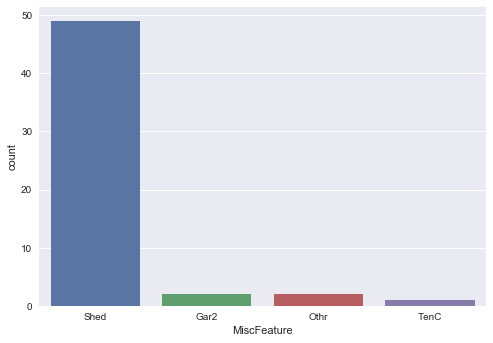

In [8]:
#FIGURE 3
#Look at MiscFeature. About 1400 houses don't have miscellaneous features, so can give those houses a MiscFeature of None.
sns.countplot(x="MiscFeature", data=train)
train.loc[train.MiscFeature.isnull(), "MiscFeature"] = "None"

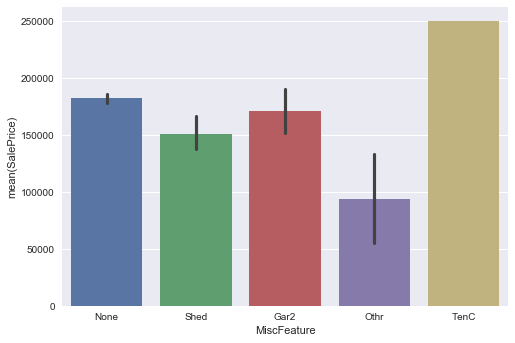

In [9]:
#FIGURE 4
#Doesn't seem like either having a miscellaneous item or not affects SalePrice too much. Houses with tennis courts are features
#of houses that have been sold for higher prices.
sns.barplot(x="MiscFeature", y="SalePrice", data=train)

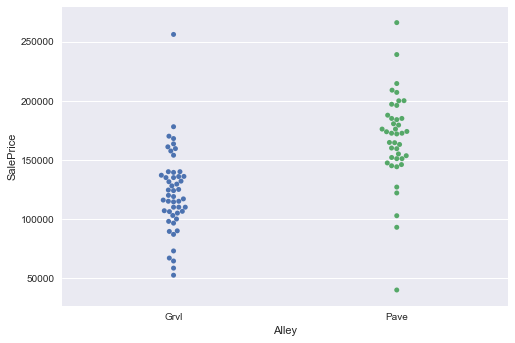

In [10]:
#FIGURE 5
#Looking at Alley - Can see that houses with paved alley access have higher SalePrice. We can impute values for no alley access
#as "None"
sns.swarmplot(x="Alley", y="SalePrice", data=train)
train.loc[train.Alley.isnull(), "Alley"] = "None"

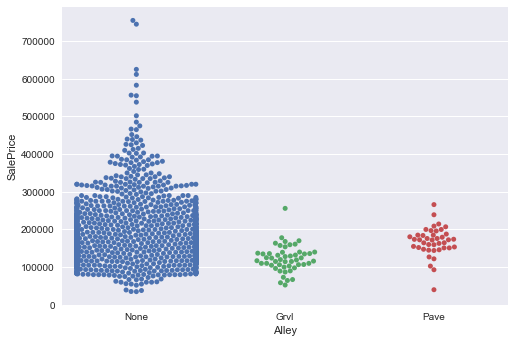

In [11]:
#FIGURE 6 - After data imputation for missing values of Alley
sns.swarmplot(x="Alley", y="SalePrice", data=train)

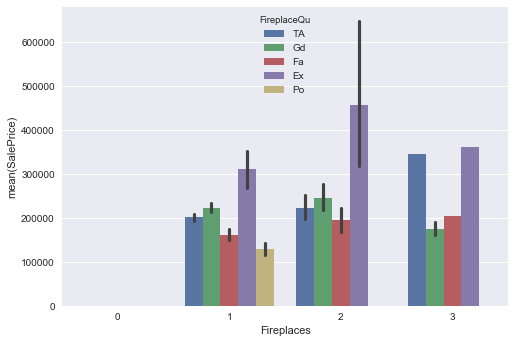

In [12]:
#FIGURE 7
#Look at Fireplace Quality and Number of Fireplaces.
sns.barplot(x="Fireplaces", y="SalePrice", hue="FireplaceQu", data=train)

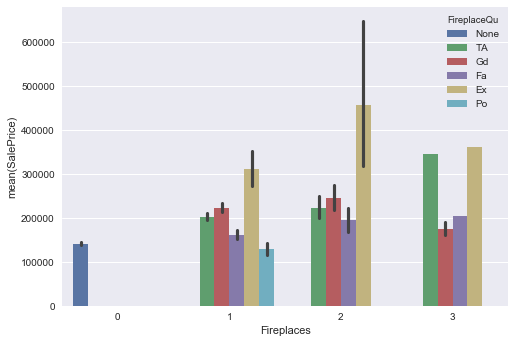

In [13]:
#FIGURE 8 - After FireplaceQu missing data imputation.
train.loc[train.FireplaceQu.isnull(), "FireplaceQu"] = "None"
sns.barplot(x="Fireplaces", y="SalePrice", hue="FireplaceQu", data=train)

In [14]:
#Look at Garage Missing Variables
#All the missing variables dealing with Garages have the same number of missing values (81); indicates that they most likely
#reference the same set of houses.
train.loc[train.GarageCond.isnull(), "GarageCond"] = "None"
train.loc[train.GarageType.isnull(), "GarageType"] = "None"
train.loc[train.GarageYrBlt.isnull(), "GarageYrBlt"] = 0.0
train.loc[train.GarageFinish.isnull(), "GarageFinish"] = "None"
train.loc[train.GarageQual.isnull(), "GarageQual"] = "None"

In [15]:
#Look at Basement missing variables
#All missing variables dealing with Basements relate to if the particular house does not have a basement. For all the missing
#variables, I will impute the value "None".
train.loc[train.BsmtExposure.isnull(), "BsmtExposure"] = "None"
train.loc[train.BsmtFinType2.isnull(), "BsmtFinType2"] = "None"
train.loc[train.BsmtFinType1.isnull(), "BsmtFinType1"] = "None"
train.loc[train.BsmtCond.isnull(), "BsmtCond"] = "None"
train.loc[train.BsmtQual.isnull(), "BsmtQual"] = "None"

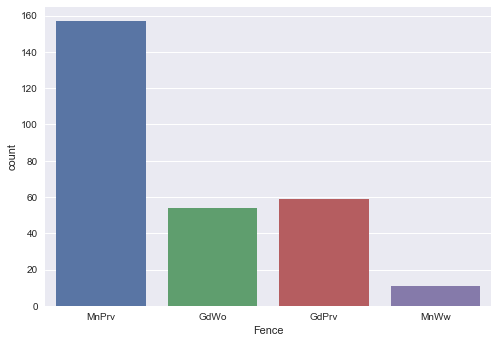

In [16]:
#FIGURE 9
#look at fence missing variables
sns.countplot(x="Fence", data=train)
train.loc[train.Fence.isnull(), "Fence"] = "None"

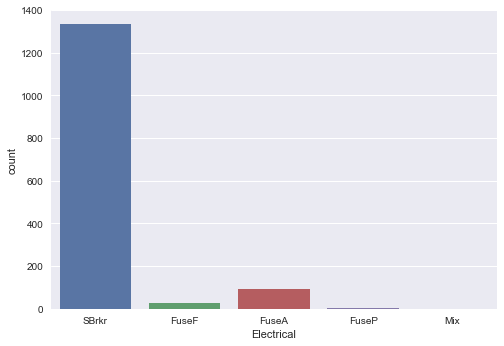

In [17]:
#FIGURE 10
#look at 1 missing variable in Electrical
#Most of the values for Electrical fall under the Standard Circuit Board & Romex category, so I will impute the missing variable
#as SBrkr.
sns.countplot(x="Electrical", data=train)
train.loc[train.Electrical.isnull(), "Electrical"] = "SBrkr"

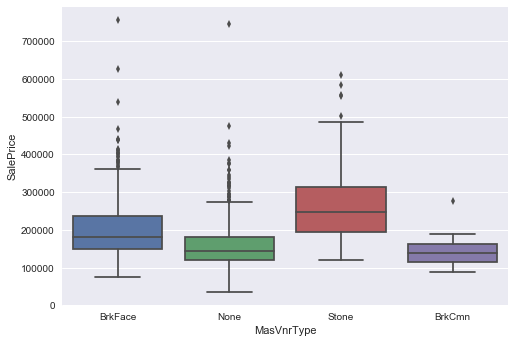

In [18]:
#FIGURE 11
#Look at MasVnrArea and MasVnrType
sns.boxplot(x=train["MasVnrType"], y=train["SalePrice"])

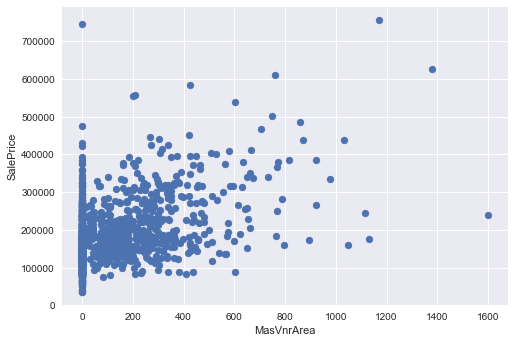

In [19]:
#FIGURE 12
plt.scatter(train["MasVnrArea"], train["SalePrice"])
plt.xlabel("MasVnrArea")
plt.ylabel("SalePrice")

In [20]:
#Will fill in missing variables in MasVnrType as "None" and in MasVnrArea as 0.0. That continuous variable is a float type.
train.loc[train.MasVnrArea.isnull(), "MasVnrArea"] = 0.0
train.loc[train.MasVnrType.isnull(), "MasVnrType"] = "None"

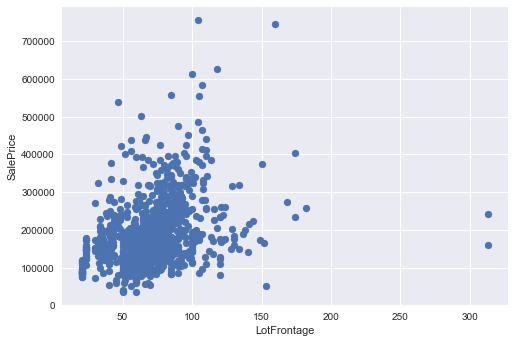

In [21]:
#FIGURE 13
#LotFrontage missing variables. Since it looks like there are extreme outlier variables for LotFrontage, I will replace missing
#values with the median instead of the mean.
plt.scatter(train["LotFrontage"], train["SalePrice"])
plt.xlabel("LotFrontage")
plt.ylabel("SalePrice")

In [22]:
#replacing null variables with median
train.loc[train.LotFrontage.isnull(), "LotFrontage"] = train["LotFrontage"].median()

In [23]:
#TABLE 4
#Check to see if there are anymore null values. No there isn't.
null_values = train.isnull().sum().sort_values(ascending = False)
null_values.head(20)

SalePrice       0
Heating         0
RoofStyle       0
RoofMatl        0
Exterior1st     0
Exterior2nd     0
MasVnrType      0
MasVnrArea      0
ExterQual       0
ExterCond       0
Foundation      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinSF1      0
BsmtFinType2    0
BsmtFinSF2      0
BsmtUnfSF       0
YearRemodAdd    0
dtype: int64

In [24]:
#Going to look at the dependent variable (one I'm trying to predict) and see how all of the features in general correlate to 
#Sales Price.

#TABLE 5
#Getting basic statistics of the SalesPrice column to see how it looks without cleaning. Can tell from a first glance that the 
#data is positively skewed. The min, 25% quartile, 50% quartile, and 75% quartile are relatively close to each other while the 
#max is an outlier (because it is greater than Q3 + 1.5*IQR).
train["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Skewness:  1.88287575977
Kurtosis:  6.53628186006


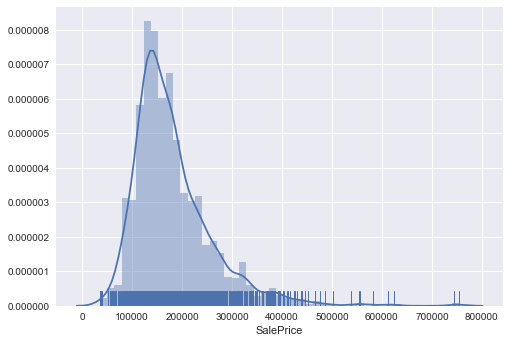

In [25]:
#FIGURE 14
#Verification that SalePrice does not follow normal distribution

sp_histogram = sns.distplot(train["SalePrice"], kde=True, rug=True)
print("Skewness: ", train["SalePrice"].skew())
print("Kurtosis: ", train["SalePrice"].kurtosis())

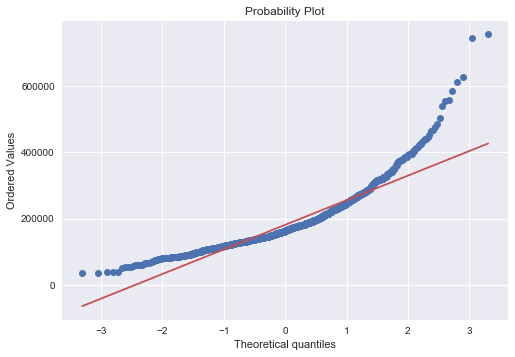

In [26]:
#FIGURE 15
#Probability Plot for SalePrice

import pylab
stats.probplot(train["SalePrice"], dist="norm", plot=pylab)
pylab.show()

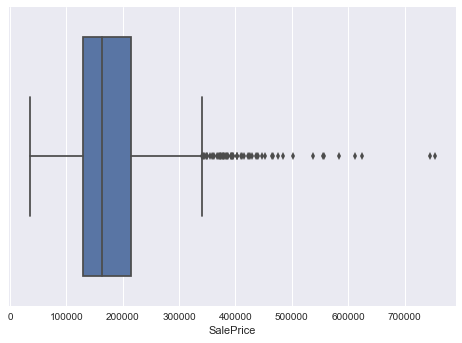

In [27]:
#FIGURE 16
#Boxplot of SalePrice
#There are a decent a lot of outliers as shown by the boxplot. The majority of the distribution is decently even though: min
#and max look to be equidistant from the 25% and 75% quartiles and the 50% quartile almost cuts the box evenly.
sns.boxplot(x=train["SalePrice"])

In [28]:
#FIGURE 17
#Log transformation of SalePrice
train['SalePrice'] = np.log(train['SalePrice'])

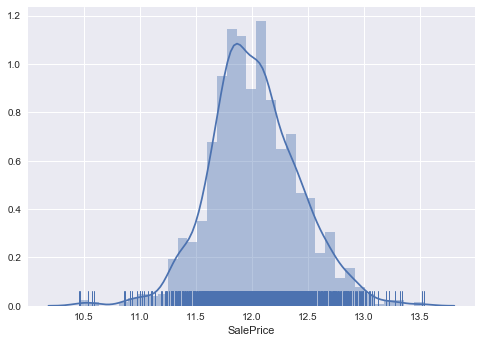

In [29]:
sp_histogram = sns.distplot(train["SalePrice"], kde=True, rug=True)

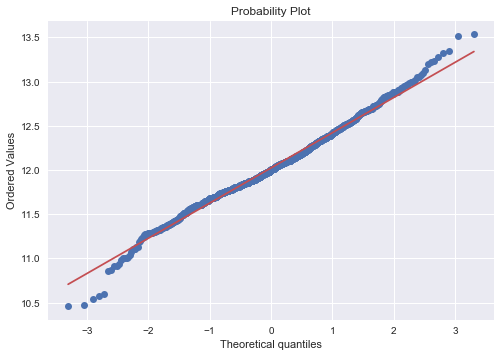

In [30]:
#FIGURE 18 - Probability plot of SalePrice after log transformation.
stats.probplot(train["SalePrice"], dist="norm", plot=pylab)
pylab.show()

In [31]:
#TABLE 6
#Correlation coefficients of SalePrice against all other predictor variables

#I will choose features with correlations coefficients above 0.4 to observe
cc = train.corr()["SalePrice"]
cc[np.argsort(cc, axis=0)[::-1]]

SalePrice        1.000000
OverallQual      0.817184
GrLivArea        0.700927
GarageCars       0.680625
GarageArea       0.650888
TotalBsmtSF      0.612134
1stFlrSF         0.596981
FullBath         0.594771
YearBuilt        0.586570
YearRemodAdd     0.565608
TotRmsAbvGrd     0.534422
Fireplaces       0.489449
MasVnrArea       0.426775
BsmtFinSF1       0.372023
GarageYrBlt      0.349014
LotFrontage      0.335292
WoodDeckSF       0.334135
OpenPorchSF      0.321053
2ndFlrSF         0.319300
HalfBath         0.313982
LotArea          0.257320
BsmtFullBath     0.236224
BsmtUnfSF        0.221985
BedroomAbvGr     0.209044
ScreenPorch      0.121208
PoolArea         0.069798
MoSold           0.057329
3SsnPorch        0.054900
BsmtFinSF2       0.004832
BsmtHalfBath    -0.005149
Id              -0.017942
MiscVal         -0.020021
OverallCond     -0.036868
YrSold          -0.037263
LowQualFinSF    -0.037963
MSSubClass      -0.073959
KitchenAbvGr    -0.147548
EnclosedPorch   -0.149050
Name: SalePr

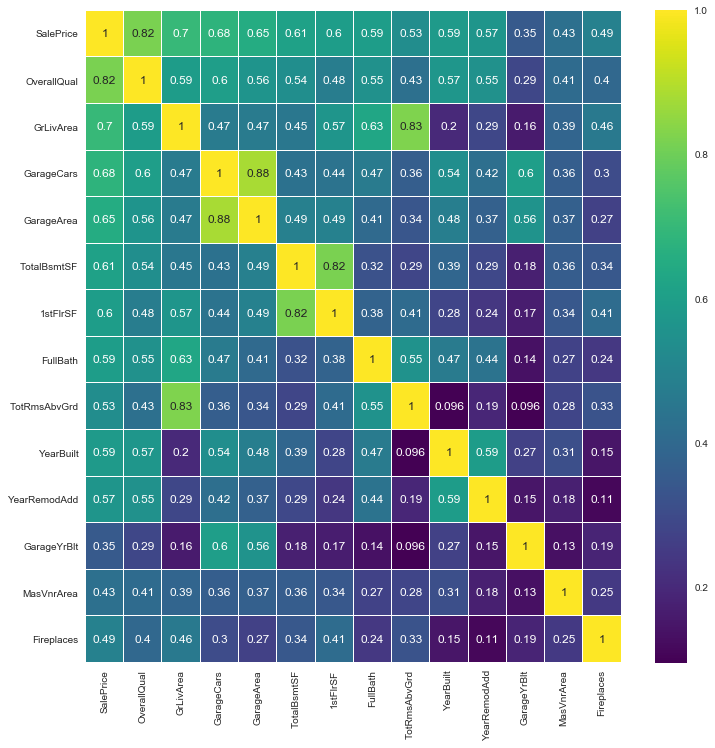

In [32]:
#FIGURE 19
#Heatmap of some predictor variables and Sale Price
#Might consider removing a redundant predictor variable to deal with multicollinearity.

quantcorr = train[["SalePrice", "OverallQual", "GrLivArea", "GarageCars", "GarageArea", "TotalBsmtSF", "1stFlrSF", "FullBath",
                  "TotRmsAbvGrd", "YearBuilt", "YearRemodAdd", "GarageYrBlt", "MasVnrArea", "Fireplaces"]].corr()

plt.figure(figsize = (12,12))
sns.heatmap(quantcorr, cmap = 'viridis', annot = True, linewidths = 0.01, linecolor = 'white', )

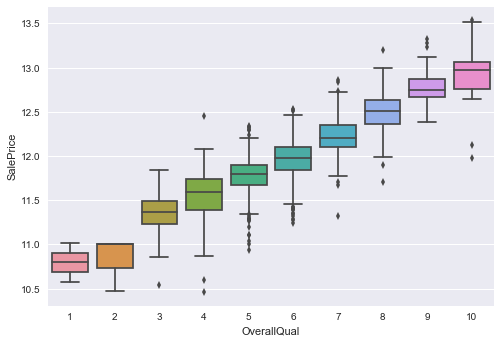

In [33]:
#FIGURE 20
#Overall Quality had the highest correlation with SalePrice...considered a strong predictor.
sns.boxplot(x="OverallQual", y="SalePrice", data=train)

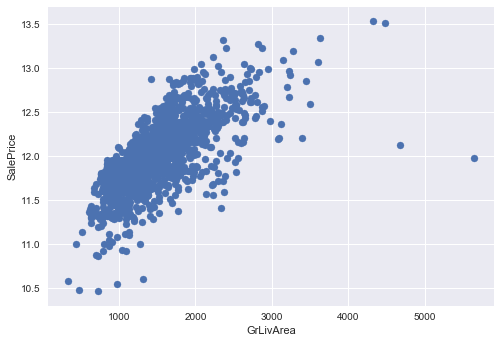

In [34]:
#FIGURE 21 - Scatter plot of GrLivArea vs. SalePrice
#Makes sense that GrLivArea and TotRmsAbvGrd are highly correlated (0.83). Total rooms in the house depends on how much
#living area you have to work with. Both positively correlate with SalePrice.

plt.scatter(train["GrLivArea"], train["SalePrice"])
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")

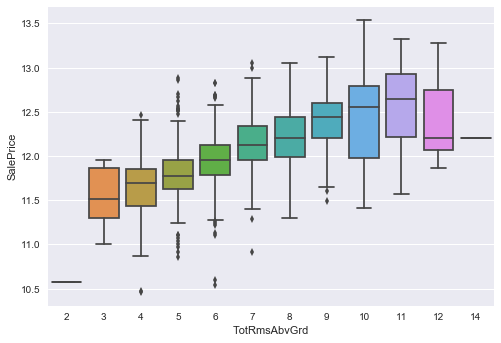

In [35]:
#FIGURE 22 - Boxplot of TotRmbsAbvGrd vs. SalePrice
sns.boxplot(x="TotRmsAbvGrd", y="SalePrice", data=train)

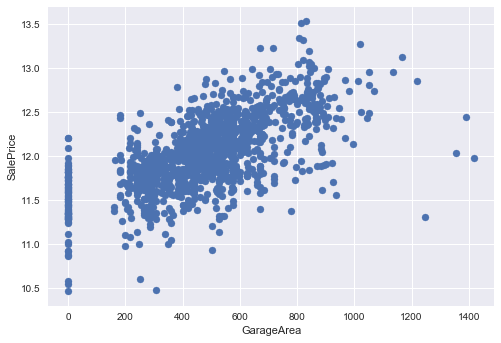

In [36]:
#FIGURE 23 - Scatter plot of GarageArea vs. SalePrice

#Makes sense that GarageCars and GarageArea are correlated. You need a bigger garage to fit more cars in the garage. 
plt.scatter(train["GarageArea"], train["SalePrice"])
plt.xlabel("GarageArea")
plt.ylabel("SalePrice")

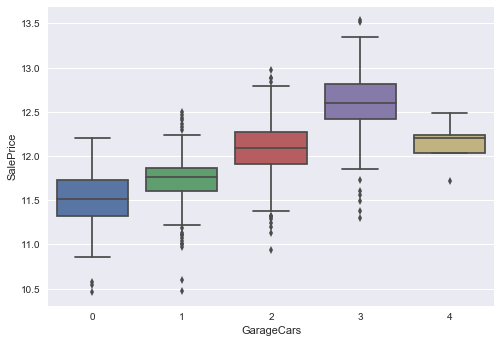

In [37]:
#FIGURE 24 - Boxplot of GarageCars vs. SalePrice
sns.boxplot(x="GarageCars", y="SalePrice", data=train)

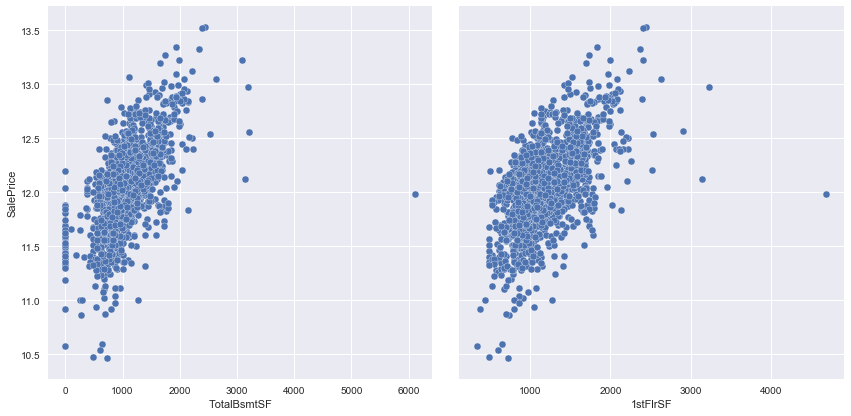

In [38]:
#FIGURE 25 - Scatterplos of both TotalBsmtSF vs. SalePrice and 1stFlrSF vs. SalePrice

#Both predictor variables correlate well with SalePrice. Increases in both causes SalePrice to increase. For both variables
#though, it seems that the max is around 3000 square feet; outliers are observed in both feature columns. It also makes sense
#that both variables are correlated with each other. The total square footage of the basement will typically relate to the total
#square footage available above it to make the first floor.
pp = sns.pairplot(train, y_vars=["SalePrice"],
                  x_vars=["TotalBsmtSF", "1stFlrSF"], size = 6)

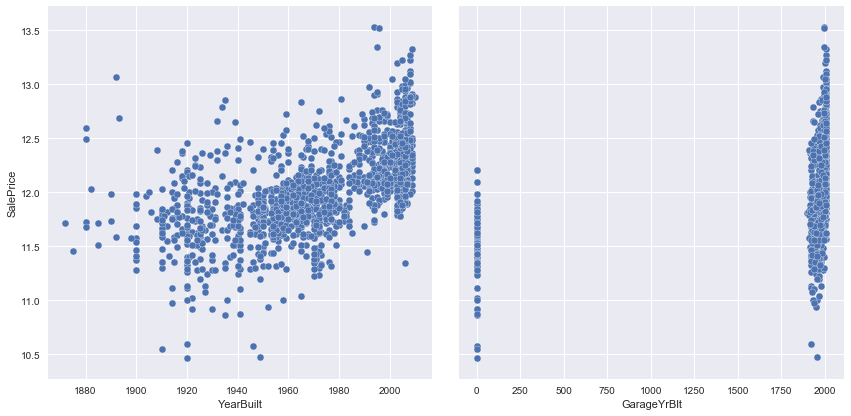

In [39]:
#FIGURE 26 - Scatter plot of YearBuilt vs. SalePrice and GarageYrBlt vs. SalePrice

#More recently built houses seem to sell for a higher SalePrice, but not by much. It also seems that garages weren't being
#incorpoated into houses till around the 1900s. It makes sense that both of these variables are 
#correlated since one would assue that the same year the house was built would be the same year that the garage would be built.
pp = sns.pairplot(train, y_vars=["SalePrice"],
                  x_vars= ["YearBuilt", "GarageYrBlt"], size = 6)

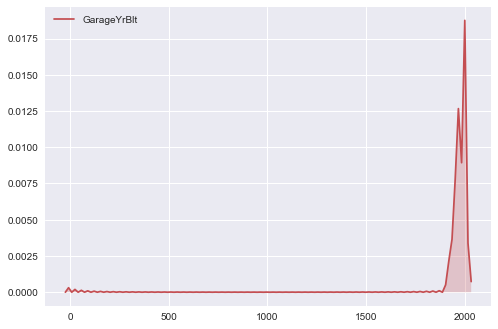

In [40]:
#FIGURE 27 - KDE plot of GarageYrBlt
#Older houses don't have garages
ax = sns.kdeplot(train["GarageYrBlt"], shade=True, color="r")

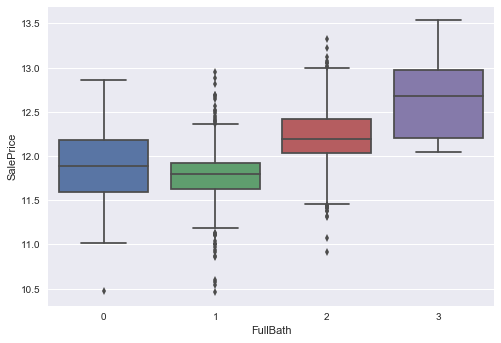

In [41]:
#FIGURE 28 - Boxplot of FullBath vs. SalePrice
#More full baths positively correlates with an increase in Sale Price. 
sns.boxplot(x="FullBath", y="SalePrice", data=train)


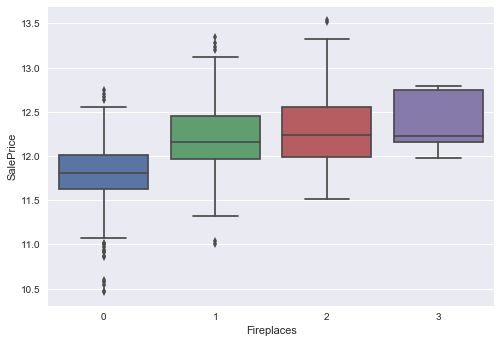

In [42]:
#FIGURE 29 - Boxplot of Fireplaces vs. SalePrice
#Generally an increase in the number of fireplaces equates to a higher sales price, although it seems that 2
#Fireplaces is the max for which SalePrice will increase by any significant amount. The houses with 3 Fireplaces don't sell 
#for that much more than houses with 2 fireplaces.
sns.boxplot(x="Fireplaces", y="SalePrice", data=train)

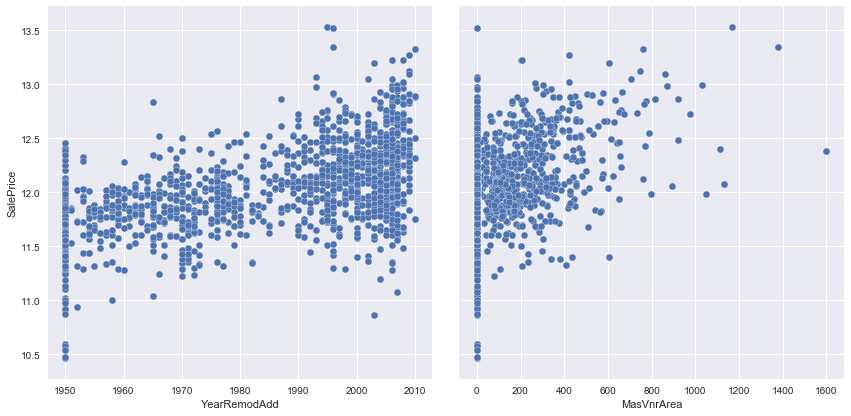

In [43]:
#FIGURE 30 - Scatterplot of YearRemodAdd vs. SalePrice and MasVnrArea vs. SalePrice

#Recently remodelled houses seem to sell for a higher SalePrice, but the effect isn't as strong.

#Masonry veneer area seems to be a trouble feature. It looks to be loosely positively correlated with SalePrice, yet houses 
#with 0 area of masonry veneer sell for pretty high, similar to those with at least some masonry veneer area.
pp = sns.pairplot(train, y_vars=["SalePrice"],
                  x_vars= ["YearRemodAdd", "MasVnrArea"], size = 6)

**Categorical Variables**


In [44]:
#Retrieved all of the names of the qualitative features in the dataset. Will look at a couple.
train.select_dtypes(include = ['object']).columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

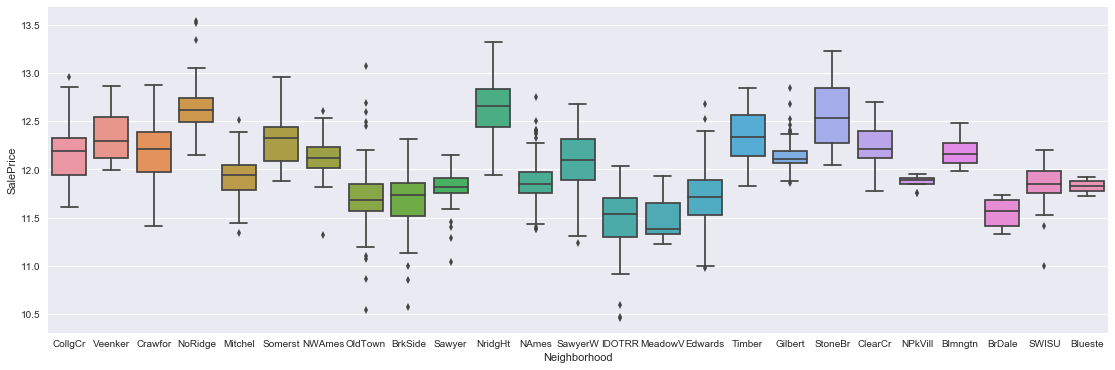

In [45]:
#FIGURE 31
#Neighborhood, neighborhood, neighborhood. Traditionally a very important predictor of SalePrice
plt.figure(figsize = (19, 6))
sns.boxplot(x="Neighborhood", y="SalePrice", data=train)

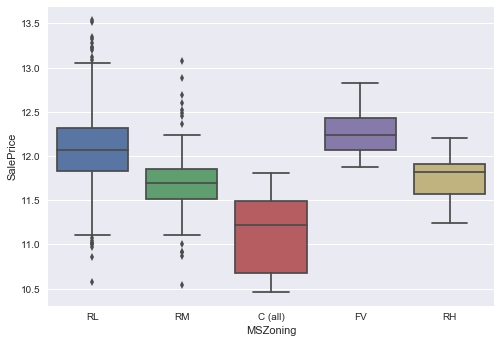

In [46]:
#FIGURE 32
#FV = Floating Village Residential, RL = Residential Low Density
#Both sell for generally similar and higher prices than where other houses are located...there are a select couple of houses in
#RL zones that sell for pretty high prices.
sns.boxplot(x="MSZoning", y="SalePrice", data=train)

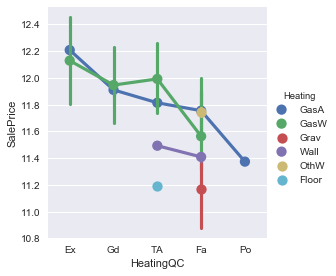

In [47]:
#FIGURE 33 - Factorplot of HeatingQC vs. SalePrice with Heating type as a color filter.
#GasA = Gas forced warm air furnace; GasW = Gas hot water or streamed heat.
sns.factorplot(x="HeatingQC", y="SalePrice", hue="Heating", data=train)

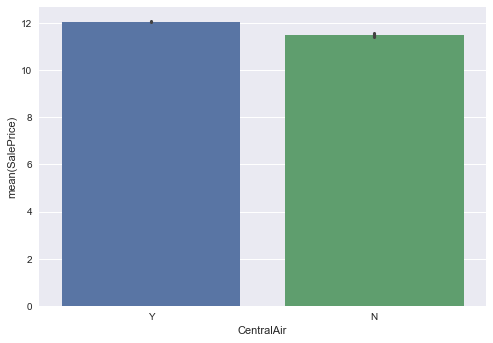

In [48]:
#FIGURE 34 - Barplot of Central Air vs. mean SalePrice
sns.barplot(x="CentralAir", y="SalePrice", data=train);

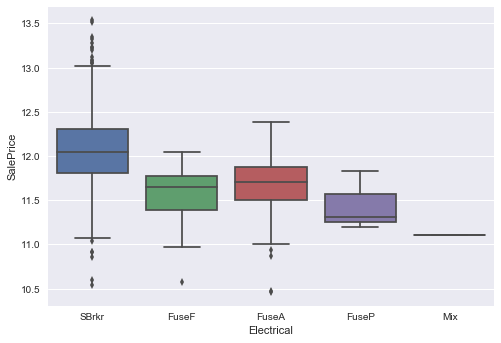

In [49]:
#FIGURE 35 - Boxplot of Electrical type vs. SalePrice
#Houses with Standard Circuit Breakers & Romex usually sell for higher prices.
sns.boxplot(x="Electrical", y="SalePrice", data=train)

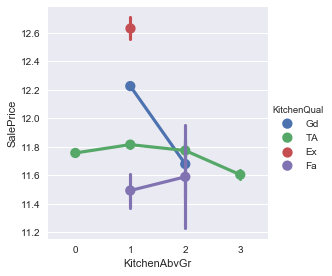

In [50]:
#FIGURE 36 - Factorplot of KitchenAbvGrd vs. SalePrice with KitchenQual as a color filter
#Excellent Kitchen Quality increases SalePrice

sns.factorplot(x="KitchenAbvGr", y="SalePrice", hue="KitchenQual", data=train)

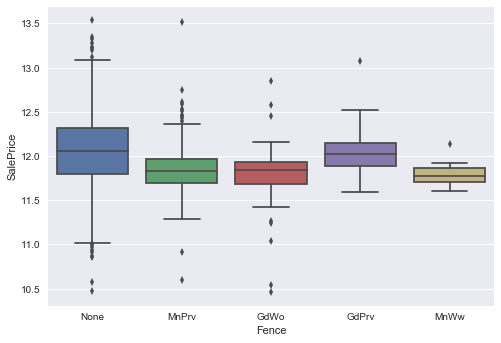

In [51]:
#FIGURE 37 - Boxplot of Fence type vs. SalePrice
#Not a great predictor because houses with No fence have a wide distribution of SalePrice relative to those that do have a fence.
sns.boxplot(x=train["Fence"], y=train["SalePrice"])

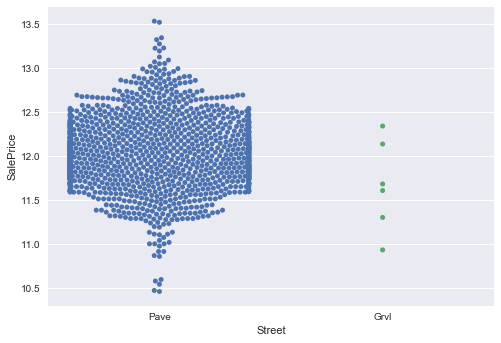

In [52]:
#FIGURE 38 - Swarmplot of Street vs. SalePrice
sns.swarmplot(x="Street", y="SalePrice", data=train)

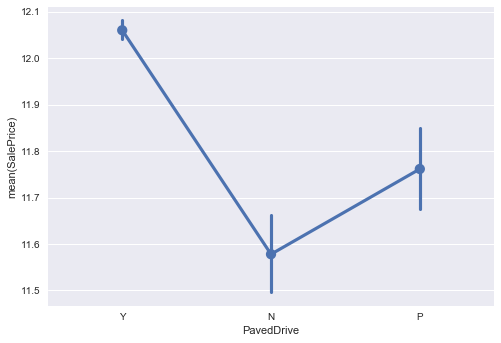

In [53]:
#FIGURE 39 - Pointplot of PavedDrive vs. SalePrice
#PavedDrives positively correlated with higher SalePrice
sns.pointplot(x="PavedDrive", y="SalePrice", data=train)

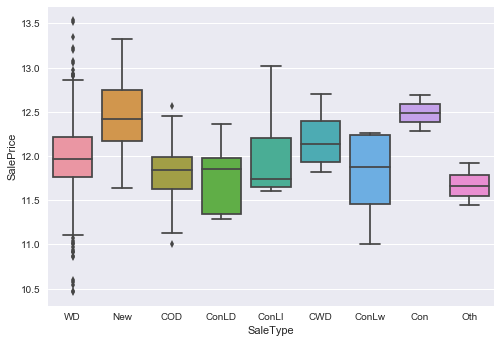

In [54]:
#FIGURE 40 - BoxPlot of SaleType vs. SalePrice
#Houses that are New generally sell for higher prices. A good amount of houses that are sold by Waranty Deed (Cash) and Warranty
#Deed (Conventional) are also sold for high SalePrices.
sns.boxplot(x=train["SaleType"], y=train["SalePrice"])

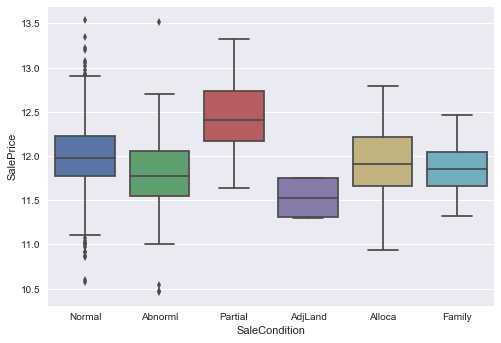

In [55]:
#FIGURE 41 - Boxplot of SaleCondition vs. SalePrice
#Partial means Home was not completed when last assessed (associated with new homes). New homes sell for higher SalePrice as well
#as those that are transacted through Normal Sales
sns.boxplot(x=train["SaleCondition"], y=train["SalePrice"])